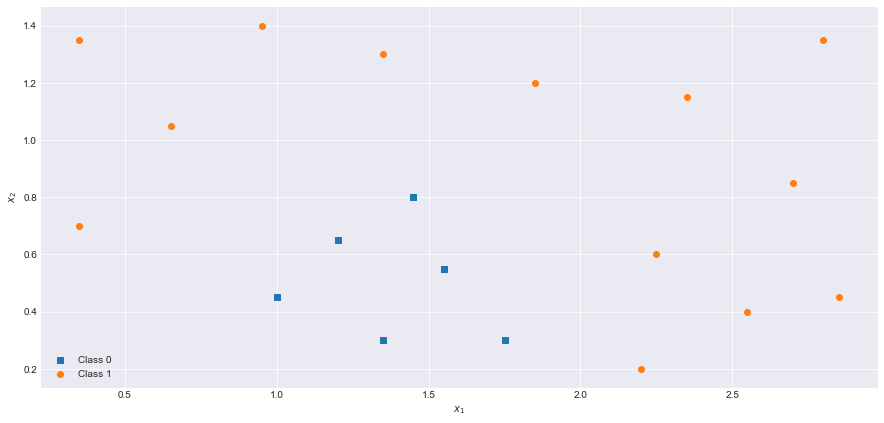

In [2]:
import numpy as np
from matplotlib import pyplot as plt
try:
    import seaborn  # provides fancy plotting styles
    seaborn.set_style('darkgrid')
except:
    print('seaborn package not available.')

X = np.array([[0.35, 0.7], [0.35, 1.35], [0.65, 1.05], [0.95, 1.4], [1.35, 1.3], [1.85, 1.2], [2.35, 1.15], [2.25, 0.6], [2.2, 0.2], [2.55, 0.4], [2.7, 0.85], [2.8, 1.35], [2.85, 0.45],
              [1, 0.45], [1.2, 0.65], [1.35, 0.3], [1.45, 0.8], [1.55, 0.55], [1.75, 0.3]])
y = np.array([1] * 13 + [0] * 6)

plt.figure(figsize=(15,7))
plt.scatter(*X[y==0].T, marker='s', label="Class 0")
plt.scatter(*X[y==1].T, marker='o', label="Class 1")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

## Task I: Linear Classification
The dataset (X,y) poses a 2d classification problem: Each pair $(x_1,x_2)$ of features is associated to one of the two classes, 0 or 1.

1. Explain why the classes are not linearly separable if we consider the feature vectors $\mathbf{x}=(x_1,x_2)^T$.
2. Does the situation change if we write the same points as higher-dimensional feature vectors $\mathbf{x}=(x_1,x_1^2,x_2)^T$?  
   Visualize the features in a [3d scatter plot](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) and look at 2d scatter plots of $(x_1, x_1^2)$ and $(x_1^2,x_2)$.

1. It can be clearly seen that the two classes are not linearly separable, i.e. we can not draw any line that will separate the two classes into two disjoint sets perfectly.
2. Introducing a nonlinear deformation of the input features, i.e. $x_1^2$, the dataset might become linearly separable:

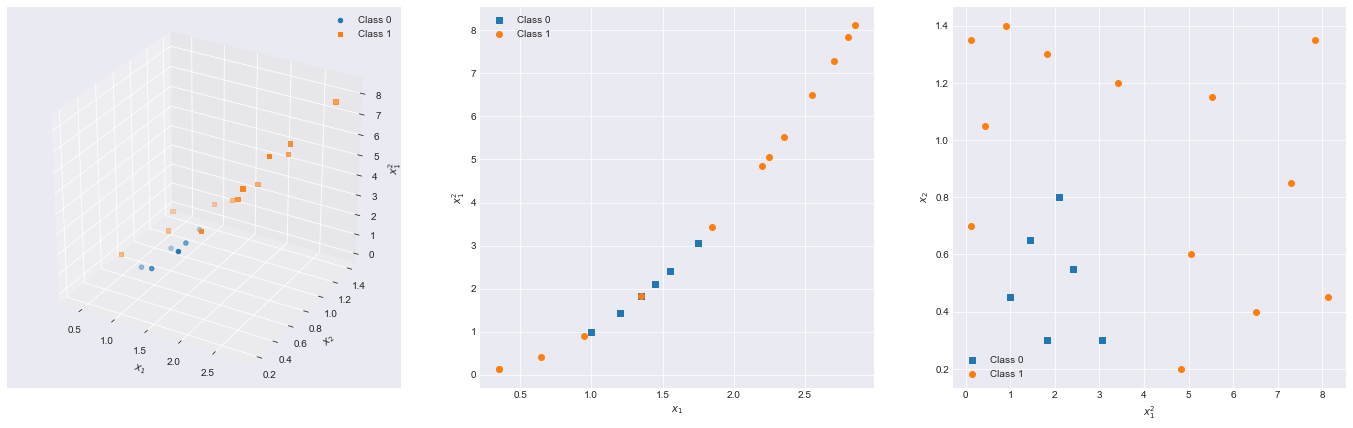

In [3]:
X_ = np.column_stack([X, X[:,0]**2])

from mpl_toolkits.mplot3d import Axes3D  # allow 3d plots
fig = plt.figure(figsize=(24, 7))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(*X_[y==0].T, marker='o', label="Class 0")
ax.scatter(*X_[y==1].T, marker='s', label="Class 1")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2$')
ax.legend()

feature_selection=[0,2]  # only plot x_1 and x_1^2
ax = fig.add_subplot(132)
plt.scatter(*X_[y==0][:,feature_selection].T, marker='s', label="Class 0")
plt.scatter(*X_[y==1][:,feature_selection].T, marker='o', label="Class 1")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_1^2$')
ax.legend()

feature_selection=[2,1]  # only plot x_1^2 and x_2
ax = fig.add_subplot(133)
plt.scatter(*X_[y==0][:,feature_selection].T, marker='s', label="Class 0")
plt.scatter(*X_[y==1][:,feature_selection].T, marker='o', label="Class 1")
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$x_2$')
ax.legend()

fig.show()

## Task II: Fisher-Classification

1. Create a two-dimensional dataset with samples drawn from two Gaussian-distributed classes $C_1$ and $C_2$ as follows:
   - The samples in $C_1$ should have mean $\mu_1 = (1, 0)^T$ and covariance matrix $\Sigma = 
\begin{pmatrix}
  0.5 & -0.3 \\
  -0.3 &  0.5
\end{pmatrix}$
   - The samples in $C_2$ should have mean $\mu_2 = (-1, 0)^T$ and the same covariance matrix $\Sigma$.

2. Based on the true probability distribution, compute the Fisher discriminant $(\mathbf{w}^*, b^*)$.  
   Project the 2d data onto $\mathbf{w}^*$ and [plot a histogram](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) of those scalars, colored differently based on the class to yield a figure similar to the slide "Nearest Neighbor vs. Fisher Classifier".

3. Draw at random 10, 100, 500 samples from the dataset as training data and compute the Fisher discriminants for these samples, i.e. the empirically determined $(\hat{\mathbf w}, \hat{b})$.  
   How do they differ compared to $(\mathbf{w}^*, b^*)$? Test the classification accuracy of each discriminant on an independent test set comprising 200 samples.

   Plot the training and test samples together with the class boundary computed by the Fisher classifier.

### Reads on Fisher-Classifier (Linear Discriminant Analysis / LDA)

- [Link1](https://sthalles.github.io/fisher-linear-discriminant/)
- [Link2](https://goelhardik.github.io/2016/10/04/fishers-lda/)
- [Link3](https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2)
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

### 1. Creating the dataset

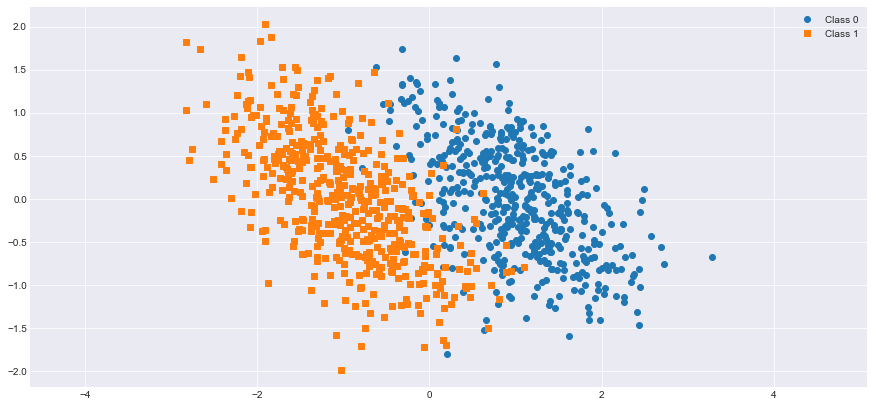

In [4]:
mu = np.array([[1, 0], [-1, 0]])
Sigma = np.array([[0.5, -0.3], 
                  [-0.3, 0.5]])  # common covariance matrix
    
def sample_data(sample_size = 50):
    C1 = np.random.multivariate_normal(mu[0], Sigma, sample_size)
    C2 = np.random.multivariate_normal(mu[1], Sigma, sample_size)
    X = np.concatenate([C1, C2])
    Y = np.concatenate([np.zeros(sample_size, dtype=int),
                        np.ones(sample_size, dtype=int)])
    return X, Y

X, Y = sample_data(500)
plt.figure(figsize=(15,7))
plt.plot(*X[Y==0].T, 'o', label="Class 0")
plt.plot(*X[Y==1].T, 's', label="Class 1")
plt.axis('equal')
plt.legend()
plt.show()

### 2. Fisher discriminant
The Fisher discriminant determines the optimal weight $\mathbf w^*$ to linearly separate the two classes.

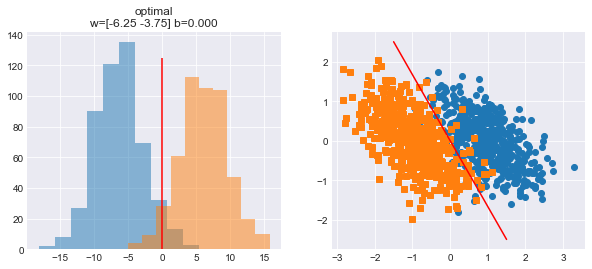

In [5]:
def fisher_discriminant(Sigma, mu):
    SigmaInv = np.linalg.inv(Sigma)
    w = SigmaInv.dot(mu[1] - mu[0])
    b = (mu[0].T.dot(SigmaInv.dot(mu[0])) -
         mu[1].T.dot(SigmaInv.dot(mu[1]))) / 2.0
    return w, b

def plot(X, Y, w, b, ax1, ax2, title=''):
    C1 = np.dot(X[Y==0], w)
    C2 = np.dot(X[Y==1], w)

    # histogram plots
    ax1.hist(C1, alpha=0.5)
    ax1.hist(C2, alpha=0.5)
    # class boundary as vertical red line at bias
    ax1.vlines(-b, 0, len(Y)/8, 'r')
    np.set_printoptions(precision=3)
    ax1.set_title('{}\nw={} b={:.3f}'.format(title, w, b))

    # scatter plots
    ax2.plot(*X[Y==0].T, 'o', label="Class 0")
    ax2.plot(*X[Y==1].T, 's', label="Class 1")
    # plot class boundary as a red line: x2 = (w1 * x1 + b) / -w2
    xs = np.array([-1.5,1.5])
    ys = (w[0] * xs + b) / -w[1]
    ax2.plot(xs, ys, 'r-')

w_opt, b_opt = fisher_discriminant(Sigma, mu)

fig = plt.figure(figsize=(10,4))
plot(X, Y, w_opt, b_opt, fig.add_subplot(121), fig.add_subplot(122), title='optimal')

### 3. Fisher classification

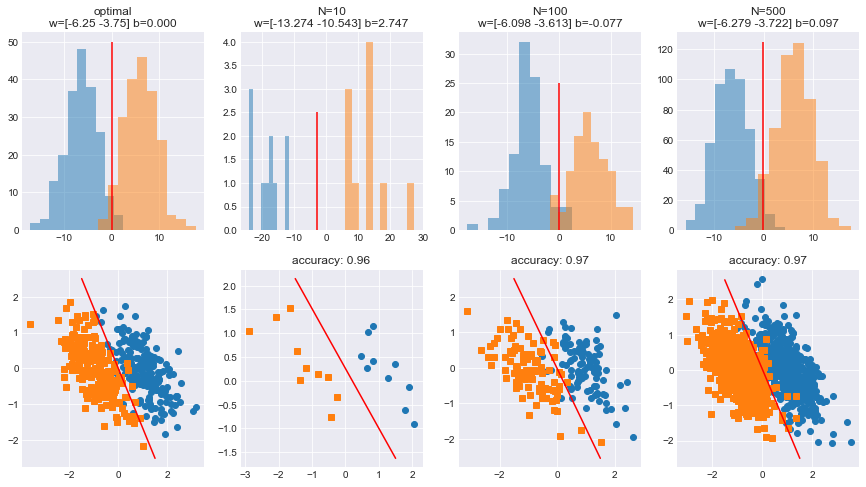

In [12]:
X_test, Y_test = sample_data(200)

fig = plt.figure(figsize=(15,8))
plot(X_test, Y_test, w_opt, b_opt, fig.add_subplot(241), fig.add_subplot(245), title='optimal')

for i, size in enumerate([10, 100, 500]):
    # sample training data
    X, Y = sample_data(size)
    # compute training data statistics
    mean = np.stack([np.mean(X[Y==0], axis=0), 
                           np.mean(X[Y==1], axis=0)])
    cov = 0.5 * (np.cov(X[Y==0].T) + 
                 np.cov(X[Y==1].T))
    # compute Fisher discriminant from estimated training data statistics
    w_hat, b_hat = fisher_discriminant(cov, mean)

    plot(X, Y, w_hat, b_hat, fig.add_subplot(2,4,i+2), fig.add_subplot(2,4,i+6), title='N={}'.format(size))
    
    # predict classes on X_test
    Y_pred = (X_test.dot(w_hat) + b_hat > 0).astype(int)
    # accuracy = number of correct classifications / number of test samples
    plt.title('accuracy: {acc}'.format(acc = np.sum(Y_pred == Y_test) / len(Y_test)))

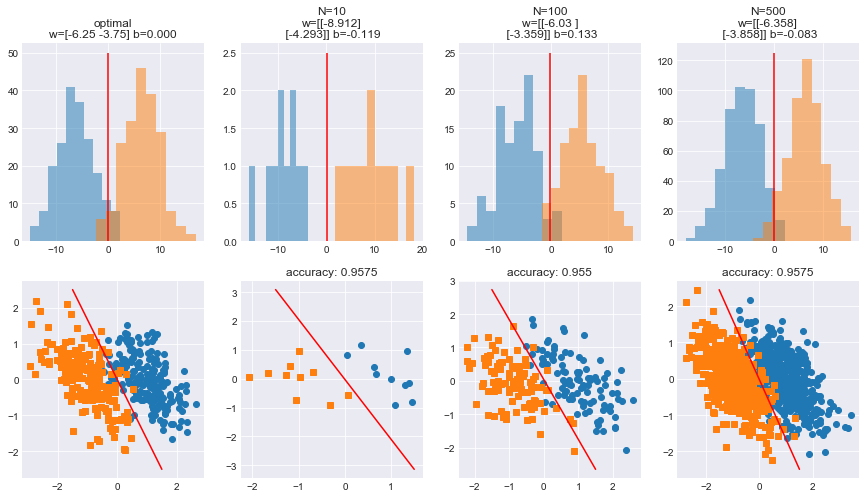

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

X_test, Y_test = sample_data(200)

fig = plt.figure(figsize=(15,8))
plot(X_test, Y_test, w_opt, b_opt, fig.add_subplot(241), fig.add_subplot(245), title='optimal')

for i, size in enumerate([10, 100, 500]):
    # sample training data
    X, Y = sample_data(size)

    classifier = LDA()
    classifier.fit(X, Y)

    plot(X, Y, w=classifier.coef_.T, b=classifier.intercept_[0],
         ax1=fig.add_subplot(2,4,i+2), ax2=fig.add_subplot(2,4,i+6), title='N={}'.format(size))
    
    # predict classes on X_test
    Y_pred = classifier.predict(X_test)
    # accuracy = number of correct classifications / number of test samples
    plt.title('accuracy: {acc}'.format(acc = accuracy_score(Y_test, Y_pred)))

## Task III: Perceptron

Implement a perceptron and the perceptron learning rule to train a linear classification task on a generic dataset $\{(\mathbf{x}^\alpha, c^\alpha)\}_{\alpha \in \{1, \dotsc, M\}}$ with $K$ classes, i.e.: 
* `classify(x)`: $\hat{c}(\mathbf{x}) = \operatorname{argmax}_{i=1, \dotsc K} \mathbf y(\mathbf x)$ where $\mathbf y(\mathbf x) = \mathbf W \cdot \mathbf x$
* `train(x,c,ĉ)`: `if` $\hat{c} \neq c$ (false classification):
  * $\Delta w_{\hat c} = -x_\alpha$ (decrease weight of wrong neuron)
  * $\Delta w_{c} = +x_\alpha$ (increase weight corresponding to correct neuron)

Use numpy matrix expressions to compute the output vector $\mathbf y(\mathbf x)$ (the discriminants) of the perceptron.  
For a multi-class problem, chose $K$ outputs and determine the predicted class via [`argmax`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

To implement the bias term, you can simply augment your feature vectors with a constant $1$: $\mathbf x' = (1, \mathbf x)$.  
Consequently, the weight vectors $\mathbf w$ will have one more dimension as well and you can interpret $w_0$ as the bias term $b$: $\mathbf w' \cdot \mathbf x' = w_0 \cdot 1 +  \mathbf w \cdot \mathbf x$.

In [14]:
class Perceptron():
    def _single_class(self):
        return self.W.shape[1] == 1

    def _train_step(self, x, y):
        y_pred = self.predict(x.reshape((1, -1)))
        if y_pred != y:
            if self._single_class():
                sign = 1 if y == 1 else -1
                self.W[0, 0] += sign
                self.W[1:, 0] += sign * x
            else:  # multi class
                self.W[1:, y_pred] -= x
                self.W[1:, y] += x
                # adapt biases
                self.W[0, y_pred] -= 1
                self.W[0, y] += 1

    def fit(self, X, y, epochs=2):
        num_classes = len(np.unique(y))
        dim_out = 1 if num_classes <= 2 else num_classes
        self.W = np.random.uniform(-0.01, 0.01, (1+X.shape[1], dim_out))
        for _ in range(epochs):
            for i in np.random.permutation(X.shape[0]):
                self._train_step(X[i], y[i])

    def predict(self, X):
        discriminant = X.dot(self.W[1:]) + self.W[0]
        if self._single_class():
            return (discriminant > 0).astype(int)
        else:  # multi class
            return np.argmax(discriminant, axis=1)

## Task IV: Perceptron Classificaton

Apply your perceptron to the following classification tasks:

1. The feature set from Task I.2, i.e. $\mathbf x = (1, x_1, x_1^2, x_2)^T$. Visualize the class boundary (a plane) in your scatter plot.
2. The dataset from Task II, using 500 samples. Visualize the class boundary and compare your results with Task II.

precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        19



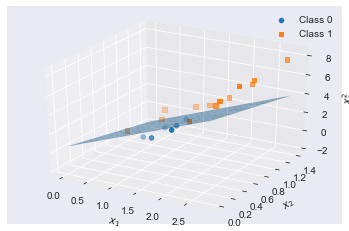

In [15]:
# 1. Application to Task I.2

X = np.array([[0.35, 0.7], [0.35, 1.35], [0.65, 1.05], [0.95, 1.4], [1.35, 1.3], [1.85, 1.2], [2.35, 1.15], [2.25, 0.6], [2.2, 0.2], [2.55, 0.4], [2.7, 0.85], [2.8, 1.35], [2.85, 0.45],
              [1, 0.45], [1.2, 0.65], [1.35, 0.3], [1.45, 0.8], [1.55, 0.55], [1.75, 0.3]])
Y = np.array([1] * 13 + [0] * 6)

X = np.column_stack([X, X[:, 0]**2])  # augment x_1^2
classifier = Perceptron()
classifier.fit(X, Y, epochs=50)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X[Y == 0].T, marker='o', label="Class 0")
ax.scatter(*X[Y == 1].T, marker='s', label="Class 1")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2$')
ax.legend()

w = classifier.W[1:, 0]
b = classifier.W[0, 0]

x, y = np.meshgrid(np.linspace(0, np.max(X[:, 0]), 10), np.linspace(0, np.max(X[:, 1]), 10))
z = (w[0] * x + w[1] * y + b) / -w[2]

ax.plot_surface(x, y, z, alpha=0.5)

from sklearn.metrics import classification_report
print(classification_report(Y, classifier.predict(X)))

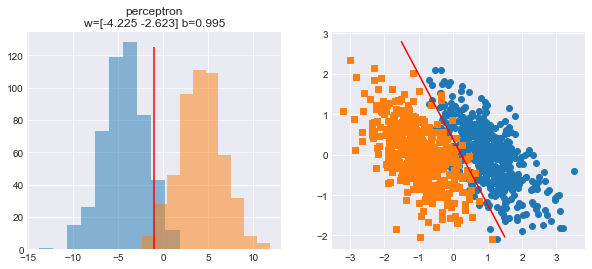

In [21]:
# 2. Application to Task II

X, Y = sample_data(500)

classifier = Perceptron()
classifier.fit(X, Y, epochs=50)

fig = plt.figure(figsize=(10,4))
plot(X, Y, classifier.W[1:,0], classifier.W[0,0], fig.add_subplot(121), fig.add_subplot(122), title='perceptron')